**실습2**
### **ade_sales 데이터를 이용한 <span style="color:darkgreen"> AI 예측</span> 문제**
---

#### 레몬/오렌지 에이드 판매량, 날짜, 위치 등의 데이터를 이용하여 판매량을 예측하는 AI 문제 입니다. 
#### AI코딩 단계에 따라 주어지는 문제를 읽고 답안을 작성하세요.
 - 데이터 : 수치형(회귀)
 - 모델 : RandomForest, DeepLearning
 - 주요 전처리 : 분석 Column 추가, 데이터 형변환, 공백 처리, label 전처리(카테고리 → 수치화)
 - 주요 학습 내용 : 산점도, 회귀형 모델 생성(회귀형 모델 ㅡ특성, input, output 처리, 손실함수 등)
---

**ade_sales.csv / 에이드 판매 데이터 컬럼 설명**
- Date : 날짜, 2016년 7월 1일 ~ 31일
- Location : 판매 장소, Park or Beach
- Lemon : 레몬 에이드 판매량
- Orange : 오렌지 에이드 판매량
- Temperature : 기온
- Leaflets : 손님에게 나누어준 전단지 수
- price : 에이드 판매 가격 (단위 : 원)

---
> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행해주시기 바랍니다.**<br>
> - AIDU 사용을 위한 AIDU 환경변수를 선언을 하는 코드. <span style="color:darkgreen"></span><br>
---

In [1]:

# AIDU 내부 연동을 위한 라이브러리
from aicentro.session import Session
from aicentro.framework.keras import Keras as AiduFrm
# AIDU와 연동을 위한 변수
aidu_session = Session(verify=False)
aidu_framework = AiduFrm(session=aidu_session)

### **Q1. Pandas를 pd로 alias하여 사용할 수 있도록 불러오는 코드를 작성하고 실행하시기 바랍니다.**
---

In [2]:
import pandas as pd

### **Q2.Matplotlib의 pyplot을 plt로 alias하여 사용할 수 있도록 불러오는 코드를 작성하고 실행하시기 바랍니다.**
---

In [3]:
import matplotlib.pyplot as plt

### **Q3.ade_sales.csv를 판다스 데이터 프레임으로 불러와서 ade에 선언하는 코드를 작성하고 실행하시기 바랍니다.**
---

In [4]:
ade = pd.read_csv(aidu_framework.config.data_dir + '/ade_sales.csv')

### **Q4. 데이터 프레임 ade의 마지막 10개 행을 조회하는 코드를 작성하고 실행하시기 바랍니다.**
---

In [5]:
ade.tail(10)

,Date,Location,Lemon,Orange,Temperature,Leaflets,price
22,7/22/2016,Park,112,75,80,108.0,5000
23,7/23/2016,Park,120,82,81,117.0,5000
24,7/24/2016,Park,121,82,82,117.0,5000
25,7/25/2016,Park,156,113,84,135.0,5000
26,7/26/2016,Park,176,129,83,158.0,3500
27,7/27/2016,Park,104,68,80,99.0,3500
28,7/28/2016,Park,96,63,82,90.0,3500
29,7/29/2016,Park,100,66,81,95.0,3500
30,7/30/2016,Beach,88,57,82,81.0,3500
31,7/31/2016,Beach,76,47,82,68.0,3500


### **Q5. 데이터 프레임 ade는 총 몇개의 row와 column을 가지고 있는지 출력하는 코드를 작성하고 실행하시기 바랍니다.**
---

In [6]:
print(ade.shape)

(32, 7)


### **Q6. 데이터 프레임 ade에서 중복된 열을 찾아 제거하는 코드를 작성하고 실행하시기 바랍니다.**
---

In [7]:
ade.drop_duplicates(inplace=True)
ade

,Date,Location,Lemon,Orange,Temperature,Leaflets,price
0,7-1-2016,Park,97,67,70,90.0,2500
1,7-2-2016,Park,98,67,72,90.0,2500
2,7-3-2016,Park,110,77,71,104.0,2500
3,7-4-2016,Beach,134,99,76,98.0,2500
4,7-5-2016,Beach,159,118,78,135.0,2500
5,7-6-2016,Beach,103,69,82,90.0,2500
7,7-7-2016,Beach,143,101,81,135.0,2500
8,7-8-2017,Beach,123,86,82,113.0,2500
9,7-9-2016,Beach,134,95,80,126.0,2500
10,7-10-2016,Beach,140,98,82,131.0,2500


### **Q7. 데이터 프레임 ade에서 컬럼 Date의 데이터 타입을 날짜타입으로 올바르게 변환하는 코드를 작성하고 실행하시기 바랍니다.**
---

In [8]:
ade['Date'] = ade['Date'].astype('datetime64[ns]')

### **Q8. 데이터 프레임 ade에서 빈칸의 위치를 찾는 코드를 작성하고 실행하시기 바랍니다.**
---

In [9]:
ade.isnull()

,Date,Location,Lemon,Orange,Temperature,Leaflets,price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False


### **Q9. 8번 문항(Q8)에서 확인된 빈칸을, 빈칸으로 부터 과거 4일사이의 값들의 평균을 계산하고 반올림하여 메우는(Imputing) 코드를 작성하고 실행하시기 바랍니다.**
---

In [10]:
avg = ade['Leaflets'][15:19]
print(avg)
avg = avg.mean()
avg = avg.round()
ade['Leaflets'].fillna(avg, inplace=True)

print(avg)
ade

16     90.0
17    126.0
18    122.0
19    113.0
Name: Leaflets, dtype: float64
113.0


,Date,Location,Lemon,Orange,Temperature,Leaflets,price
0,2016-07-01,Park,97,67,70,90.0,2500
1,2016-07-02,Park,98,67,72,90.0,2500
2,2016-07-03,Park,110,77,71,104.0,2500
3,2016-07-04,Beach,134,99,76,98.0,2500
4,2016-07-05,Beach,159,118,78,135.0,2500
5,2016-07-06,Beach,103,69,82,90.0,2500
7,2016-07-07,Beach,143,101,81,135.0,2500
8,2017-07-08,Beach,123,86,82,113.0,2500
9,2016-07-09,Beach,134,95,80,126.0,2500
10,2016-07-10,Beach,140,98,82,131.0,2500


### **Q10. 다음 조건에 맞추어 데이터 프레임 ade안에  day 컬럼을 추가하시기 바랍니다.**

* **
- date 컬럼을 이용하여 요일을 만드시오.
- 요일은 dt.weekday를 활용해서 진행하시면 되며,  해당 진행시 integer로 encoding 됩니다.
---

In [11]:
ade['day'] = ade['Date'].dt.weekday
ade['day']

0     4
1     5
2     6
3     0
4     1
5     2
7     3
8     5
9     5
10    6
11    0
12    1
13    2
14    3
15    4
16    5
17    6
18    0
19    1
20    2
21    3
22    4
23    5
24    6
25    0
26    1
27    2
28    3
29    4
30    5
31    6
Name: day, dtype: int64

In [12]:
# ### **Q11. 다음 조건에 맞추어 데이터 프레임 ade안에 wdwe 컬럼을 추가하시기 바랍니다.**

# * **
# - 평일(월요일 ~ 금요일) 이라면 wdwe 컬럼의 값은 1, 평일이면 day 의 값이 = 1,2,3,4,
# - 주말(토요일 ~ 일요일) 이라면 wdwe 컬럼의 값은 0, 주말이면 day 의 값이 = 5,6
# ---

In [13]:
import numpy as np

ade['wdwe'] = np.where(ade['day'] > 4, 0, 1)
ade

,Date,Location,Lemon,Orange,Temperature,Leaflets,price,day,wdwe
0,2016-07-01,Park,97,67,70,90.0,2500,4,1
1,2016-07-02,Park,98,67,72,90.0,2500,5,0
2,2016-07-03,Park,110,77,71,104.0,2500,6,0
3,2016-07-04,Beach,134,99,76,98.0,2500,0,1
4,2016-07-05,Beach,159,118,78,135.0,2500,1,1
5,2016-07-06,Beach,103,69,82,90.0,2500,2,1
7,2016-07-07,Beach,143,101,81,135.0,2500,3,1
8,2017-07-08,Beach,123,86,82,113.0,2500,5,0
9,2016-07-09,Beach,134,95,80,126.0,2500,5,0
10,2016-07-10,Beach,140,98,82,131.0,2500,6,0


### **Q12. 데이터 프레임 ade의 Leaflets 컬럼을 x축으로 Lemon 컬럼을 y축으로하는 산점도를 시각화 하시기 바랍니다.**

* **
- 타이틀이 Lemon ~ Leaflets 이어야 한다.
---

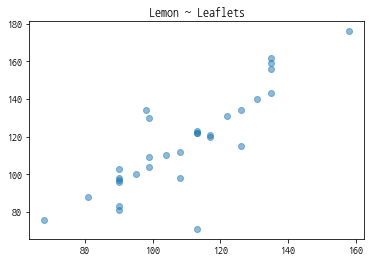

In [14]:
plt.scatter(ade['Leaflets'], ade['Lemon'], alpha=0.5)
plt.title('Lemon ~ Leaflets')
plt.show()

### **Q13. 데이터 프레임 ade안에 다음 조건에 맞추어 effect_leaflets 컬럼을 추가하시기 바랍니다.**

* **
- 레몬에이드와 오렌지에이드의 판매량 합계를 전단지 수로 나눈 값을 effect_leaflets로 정의한다.
---

In [15]:
ade['effect_leaflets'] = (ade['Lemon'] + ade['Orange']) / ade['Leaflets']
ade

,Date,Location,Lemon,Orange,Temperature,Leaflets,price,day,wdwe,effect_leaflets
0,2016-07-01,Park,97,67,70,90.0,2500,4,1,1.822222
1,2016-07-02,Park,98,67,72,90.0,2500,5,0,1.833333
2,2016-07-03,Park,110,77,71,104.0,2500,6,0,1.798077
3,2016-07-04,Beach,134,99,76,98.0,2500,0,1,2.377551
4,2016-07-05,Beach,159,118,78,135.0,2500,1,1,2.051852
5,2016-07-06,Beach,103,69,82,90.0,2500,2,1,1.911111
7,2016-07-07,Beach,143,101,81,135.0,2500,3,1,1.807407
8,2017-07-08,Beach,123,86,82,113.0,2500,5,0,1.849558
9,2016-07-09,Beach,134,95,80,126.0,2500,5,0,1.817460
10,2016-07-10,Beach,140,98,82,131.0,2500,6,0,1.816794


# 여기에 답안코드를 작성하세요



### **Q14. 데이터를 트레이닝셋 / 테스트셋으로 분할하시기 바랍니다.**
* **
- y는 데이터 프레임의 'Lemon'과 'Orange'컬럼이다.
- x는 'Temperature', 'Leaflets', 'price','effect_leaflets', 'wdwe'만 사용한다.
- train : test = 9 : 1
- Location의 Park와 Beach가 골고루 분배되도록 stratify하게 분할한다.
- 변수명 규칙은 다음과 같다.
    * x_train, y_train
    * x_test, y_test
- random state, seed 등은 2021로 설정한다.
---

In [16]:
from sklearn.model_selection import train_test_split

x = ade[['Temperature', 'Leaflets', 'price', 'effect_leaflets', 'wdwe']]
y = ade[['Lemon', 'Orange']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=ade['Location'], random_state=2021)

### **Q15. 트레이닝 데이터를 트레이닝셋 / 벨리데이션셋으로 분할하시기 바랍니다.**
* **
- x_train, y_train을 이용한다.
- train : validation = 8 : 2
- 변수명 규칙은 다음과 같다.
    * x_train, y_train
    * x_valid, y_valid
- random state, seed 등은 2021로 설정한다.
---

In [17]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=2021)

### **Q16. 다중회귀 선형분석 모델들을 학습시키시기 바랍니다.**
* **
- 트레이닝 셋 (x_train, y_train['Lemon'])을 이용하여 학습시킨다.


In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train['Lemon'])

LinearRegression()

### **Q17. linear Regression의 성능을 mean absolute error 성능 지표를 통해 확인하시기 바랍니다.**
* **
- test 데이터를 통해 모델의 예측을 시행해 보며, 예측 값 변수는 y_pred를 사용한다.
- 성능지표로는 mean absolute error를 사용한다.
- 성능지표를 출력한다.
---

In [19]:
from sklearn.metrics import mean_absolute_error

y_pred = lr.predict(x_test)
print(mean_absolute_error(y_test['Lemon'], y_pred))
print(mean_absolute_error(y_test['Orange'], y_pred))

2.8208411473155266
38.7346532196699


In [20]:
print(y_pred)
print(y_test['Lemon'])
print(y_train)
x_test

[153.82762414  79.64684771 134.43039775 123.03374328]
25    156
20     71
9     134
8     123
Name: Lemon, dtype: int64
    Lemon  Orange
24    121      82
23    120      82
30     88      57
10    140      98
1      98      67
13    109      75
22    112      75
14    122      85
29    100      66
16     81      50
21     83      50
19    122      85
12    130      95
26    176     129
11    162     120
28     96      63
17    115      76
5     103      69
7     143     101
27    104      68
0      97      67


,Temperature,Leaflets,price,effect_leaflets,wdwe
25,84,135.0,5000,1.992593,1
20,70,113.0,5000,1.000000,1
9,80,126.0,2500,1.817460,0
8,82,113.0,2500,1.849558,0


### **Q18. 예측데이터와 실제 데이터를 산점도를 통해서, 정확성에 대해 시각화하여 확인해본다.**
* **
- scatter plot을 이용한다.
- 사전에 예측한 예측 값(y_pred)와 실제 y_test의 lemon 항목에 대해 산점도를 그려본다.
- x축과 y축에 라벨을 붙여준다.
---

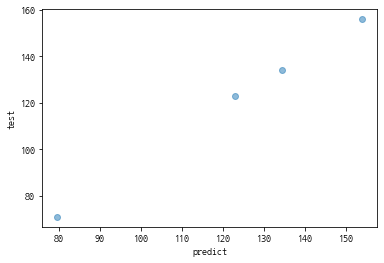

In [21]:
plt.scatter(y_pred, y_test['Lemon'], alpha=0.5)
plt.xlabel('predict')
plt.ylabel('test')
plt.show()

> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행하세요.**
>

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping

### **Q19. 아래 조건에 맞추어 뉴럴네트워크 모델을 학습시키시기 바랍니다.**
* **
- Tensorflow framework를 사용한다.
- 히든레이어는 아래와 같은 규칙에 맞추어 구성한다.
    * 1개의 fully connected layer를 사용할 것, 노드는 인풋레이어 노드의 2배로 한다.
    * Batchnormalization을 반드시 활용한다.
- output layer는 Lemon 에이드 판매량을 예측할 수 있도록 구성한다.
- output layer의 예측값이 0미만의 값이 나올 수 없도록 activation을 지정한다.
- Early stopping을 이용하여, validation loss가 100번 이상 개선되지 않으면 학습을 중단 시키고, 가장 성능이 좋았을 때의 가중치를 복구한다.
- 학습과정의 로그(loss)를 history에 선언하여 남긴다. loss function은 mse를 사용한다.(Mean Squared Error)
- epochs는 2000번을 지정한다.
---

In [28]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(5, )))
model.add(BatchNormalization())
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics='accuracy')
es = EarlyStopping(monitor='val_loss', patience=100, mode='min', verbose=1)
history = model.fit(x_train, y_train['Lemon'], epochs=2000, callbacks=[es], validation_data=(x_valid, y_valid['Lemon']), verbose=1)

Epoch 1/2000
1/1 [==============================] - 0s 127ms/step - loss: 13863.8574 - accuracy: 0.0000e+00 - val_loss: 25292.7793 - val_accuracy: 0.0000e+00
Epoch 2/2000
1/1 [==============================] - 0s 29ms/step - loss: 13862.6270 - accuracy: 0.0000e+00 - val_loss: 22014.7285 - val_accuracy: 0.0000e+00
Epoch 3/2000
1/1 [==============================] - 0s 47ms/step - loss: 13861.3945 - accuracy: 0.0000e+00 - val_loss: 20617.8027 - val_accuracy: 0.0000e+00
Epoch 4/2000
1/1 [==============================] - 0s 28ms/step - loss: 13860.1621 - accuracy: 0.0000e+00 - val_loss: 19803.7969 - val_accuracy: 0.0000e+00
Epoch 5/2000
1/1 [==============================] - 0s 28ms/step - loss: 13858.9297 - accuracy: 0.0000e+00 - val_loss: 19255.5762 - val_accuracy: 0.0000e+00
Epoch 6/2000
1/1 [==============================] - 0s 30ms/step - loss: 13857.6953 - accuracy: 0.0000e+00 - val_loss: 18853.3359 - val_accuracy: 0.0000e+00
Epoch 7/2000
1/1 [==============================] - 0s 32

### **Q20. 다음 조건에 맞추어 뉴럴네트워크의 학습 로그를 시각화 하시기 바랍니다.**
* **
- 필요한 라이브러리가 있다면 따로 불러온다.
- epochs에 따른 loss의 변화를 시각화 한다.
- train loss와 validation loss를 전부 시각화하고, 구별가능해야 한다.
- 그래프의 타이틀은 'Loss'로 표시한다.
- x축에는 'epochs'라고 표시하고 y축에는 'MSE'라고 표시한다.
---

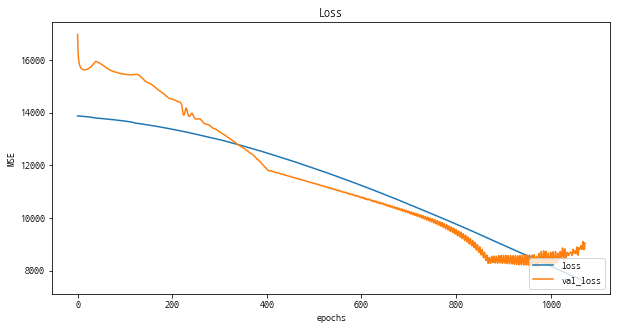

In [24]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend(['loss', 'val_loss'], loc='lower right')

### **Q22. 다음 조건에 맞추어 뉴럴네트워크의 예측 결과의 loss 값을 출력하시기 바랍니다**
* **
- test데이터를 활용하여, test 셋 데이터에 대해 mse 값을 출력하시오
---

In [25]:
from sklearn.metrics import mean_squared_error

pred = model.predict(x_test)
print(mean_squared_error(y_test['Lemon'], pred))

8540.787295145547
